In [ ]:
!pip install featurewiz==0.1.41

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 2.1 MB/s 
     |████████████████████████████████| 837 kB 40.9 MB/s 
     |████████████████████████████████| 26.7 MB 1.5 MB/s 
     |████████████████████████████████| 2.0 MB 37.3 MB/s 
     |████████████████████████████████| 1.1 MB 37.0 MB/s 
     |████████████████████████████████| 140 kB 40.0 MB/s 
     |████████████████████████████████| 69 kB 5.9 MB/s 
     |████████████████████████████████| 192.9 MB 68 kB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: pyarrow
    Found existing installatio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Data sources drive folder 
import pathlib
parquet_path = pathlib.Path("/content/drive/MyDrive/mestrado/ICPR 2022 - Brazilian E-Commerce Public Dataset by Olist/final_dataset.parquet")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
dataset=pd.read_parquet(parquet_path)
dataset=pd.get_dummies(dataset, columns=['order_status'])
dataset=dataset.drop(columns=['order_id','customer_id','customer_unique_id','review_id',
                              'order_purchase_timestamp','order_approved_at',
                              'order_delivered_carrier_date','order_delivered_customer_date',
                              'order_estimated_delivery_date','customer_city',
                              'customer_state','customer_zip_code_prefix',
                              'review_comment_title', 'review_comment_message',
                              'review_creation_date', 'review_answer_timestamp',
                              'geolocation_zip_code_prefix', 'cust_lat', 'cust_lng', 
                              'cust_city','cust_state','payment_sequential'])
dataset=dataset[dataset['review_score']!=np.nan]
dataset['review_binary']=dataset.apply(lambda x: 1 if x['review_score']>=3 else 0,axis=1)
dataset=dataset.drop(columns='review_score')

dataset.columns

Index(['delivery_performance', 'purchase_delivery_days',
       'payment_installments', 'payment_value', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_not_defined', 'payment_type_voucher', 'avg_distance',
       'avg_dist_by_order_w_by_price', 'number_of_itens', 'mean_price',
       'median_price', 'sum_price', 'total_freight_value',
       'mean_freight_value', 'total_cost', 'total_weight',
       'mean_product_description_lenght', 'mean_product_name_lenght',
       'mean_product_photos_qty', 'flag_consumiveis', 'flag_moveis',
       'flag_eltroeletronicos', 'flag_moda', 'flag_ferramentas', 'flag_outros',
       'order_status_approved', 'order_status_canceled',
       'order_status_delivered', 'order_status_invoiced',
       'order_status_processing', 'order_status_shipped',
       'order_status_unavailable', 'review_binary'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imported version = 0.1.41.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (98464, 36)
    Loaded train data. Shape = (98464, 36)
No test data filename given...
Classifying feat

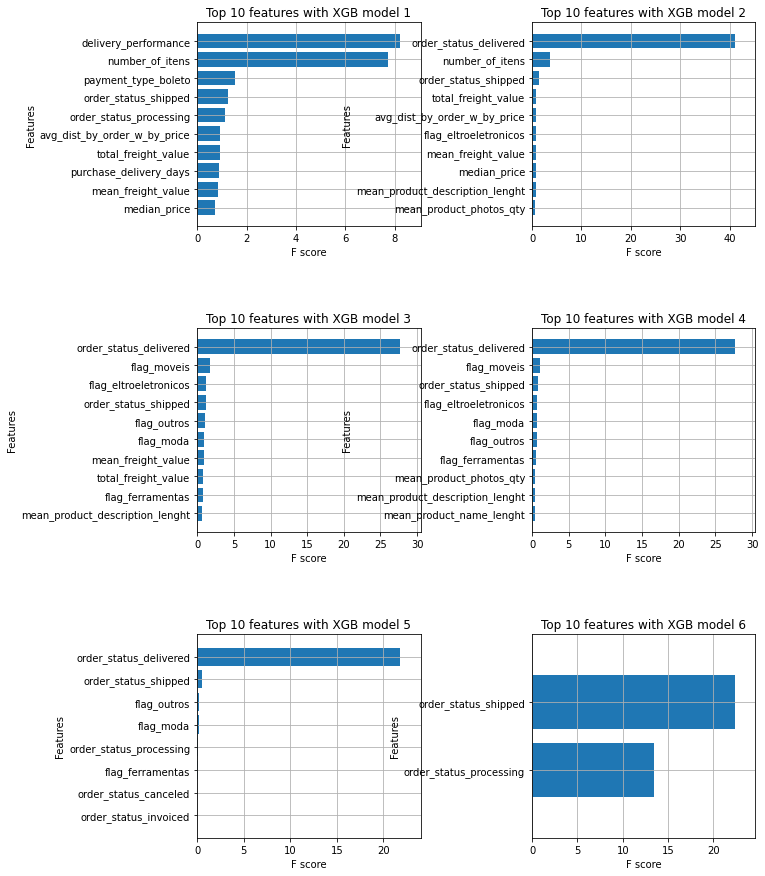

            Total time taken for XGBoost feature selection = 10 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 21 important features:
['delivery_performance', 'number_of_itens', 'payment_type_boleto', 'order_status_shipped', 'order_status_processing', 'avg_dist_by_order_w_by_price', 'total_freight_value', 'purchase_delivery_days', 'mean_freight_value', 'median_price', 'order_status_delivered', 'flag_eltroeletronicos', 'mean_product_description_lenght', 'mean_product_photos_qty', 'flag_moveis', 'flag_outros', 'flag_moda', 'flag_ferramentas', 'mean_product_name_lenght', 'order_status_canceled', 'order_status_invoiced']

    Time taken for feature selection = 23 seconds
    Reverted column names to original names given in train dataset


In [ ]:
# import packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(1234)
target = 'review_binary'
features, train = featurewiz(dataset, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
features

['delivery_performance',
 'number_of_itens',
 'payment_type_boleto',
 'order_status_shipped',
 'order_status_processing',
 'avg_dist_by_order_w_by_price',
 'total_freight_value',
 'purchase_delivery_days',
 'mean_freight_value',
 'median_price',
 'order_status_delivered',
 'flag_eltroeletronicos',
 'mean_product_description_lenght',
 'mean_product_photos_qty',
 'flag_moveis',
 'flag_outros',
 'flag_moda',
 'flag_ferramentas',
 'mean_product_name_lenght',
 'order_status_canceled',
 'order_status_invoiced']

In [ ]:
features_norm=['delivery_performance',
 'number_of_itens',
 'payment_type_boleto',
 'order_status_shipped',
 'order_status_processing',
 'avg_dist_by_order_w_by_price',
 'total_freight_value',
 'purchase_delivery_days',
 'mean_freight_value',
 'median_price',
 'order_status_delivered',
 'mean_product_description_lenght',
 'flag_outros',
 'flag_moda',
 'total_weight',
 'flag_moveis',
 'flag_eltroeletronicos',
 'flag_ferramentas',
 'total_cost',
 'flag_consumiveis',
 'payment_type_voucher',
 'order_status_canceled',
 'order_status_invoiced']

In [ ]:
differences=set(features).difference(set(features_norm))

In [ ]:
differences

{'mean_product_name_lenght', 'mean_product_photos_qty'}